### **Neural Network Ensemble for Classification**

**Abstract**

Artificial neural networks (ANNs) are computing models for information processing and pattern identification. An ANN is a network of many simple computing units called neurons or cells, which are highly interconnected and organized in layers. Neural network ensemble is a learning paradigm where several neural networks are jointly used to solve a problem. Generalization ability of a neural network can be significantly improved through ensembling neural networks, i.e. training several neural networks and combining their results in some way. Neural network ensemble is a collection of a (finite) number of neural networks that are trained for the same task. Since it behaves remarkably well and is easy to use, neural network ensemble is regarded as a promising methodology that can profit not only experts in neural computing but also ordinary engineers in real world applications. This paper presents the neural network ensemble method trained with bagging can improve the accuracy of the classifier than single neural network. The performance analysis is made with liver dataset form UCI (University of Califonia, Irvine) machine learning repository.

**Introduction**

Neural network are well known biologically inspired machine learning paradigm and they are used in many diverse areas including science, engineering and finance etc. Multilayer feedforward neural network are one of the most famous network typed widely used in machine learning community for pattern classification. The generalization ability of the classifier can be increased by combining multiple classifiers known as ensemble of classifier. The idea of ensemble methodology is to build a predictive model by integrating multiple models. Neural network ensemble is have been widely used to improve the generalization performance of single neural network. 
An ensemble neural network is a learning paradigm where a collection of a ﬁnite number of neural networks is trained for the same task. The generalization ability of the neural network system can be improved by an ensemble of neural network, i.e. training many neural networks and then combining their predictions. In general neural network ensemble is constructed in two steps, i.e. training a number of component neural networks and then combining the component predictions. Ensemble methods combine the outputs of several neural networks.
There are many approaches for building ensemble of multiple classifiers such as mixture of experts, bagging, boosting, random subspace, random forests and negative correlation learning. This project presents the neural network ensemble for classification by using bagging method. 

**Implementation**

Train and Test Accuracies of Single Neural Network 
INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.699999988079071   Test accuracy:  0.7211538553237915 

Train and Test Accuracies of Neural Networks for Ensemble 
INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.7797619104385376   Test accuracy:  0.5982142686843872 

INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.7976190447807312   Test accuracy:  0.6908212304115295 

INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.6904761791229248   Test accuracy:  0.7056074738502502 

INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.7797619104385376   Test accuracy:  0.6872037649154663 

INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.9047619104385376   Test accuracy:  0.6525821685791016 

INFO:tensorflow:Assets written to: saved_model/assets
Train accuracy:  0.8214285969734192   Test accuracy:  0.596153

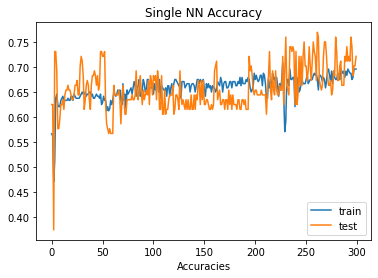

Test Accuracy of Single NN:  0.7211538553237915


***Ensemble NNs***


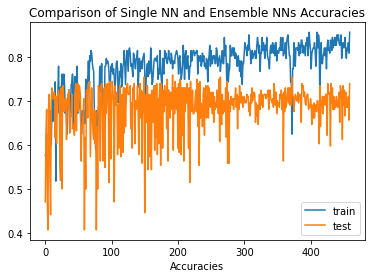

Test Accuracy of Selected NN:  0.7401960492134094


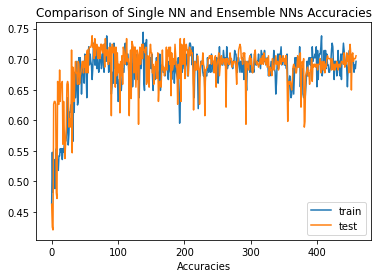

Test Accuracy of Selected NN:  0.7056074738502502


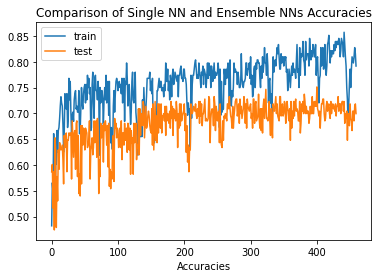

Test Accuracy of Selected NN:  0.6995305418968201


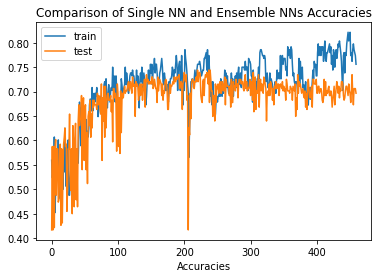

Test Accuracy of Selected NN:  0.6966824531555176


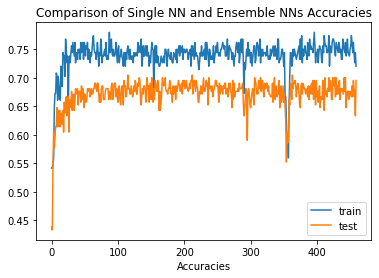

Test Accuracy of Selected NN:  0.6952381134033203


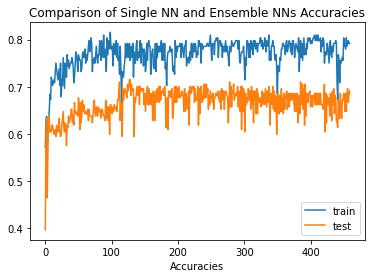

Test Accuracy of Selected NN:  0.6908212304115295


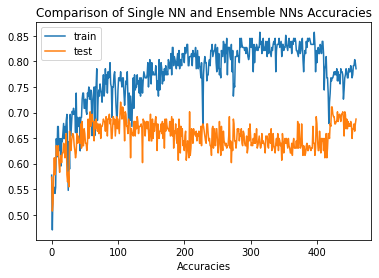

Test Accuracy of Selected NN:  0.6872037649154663


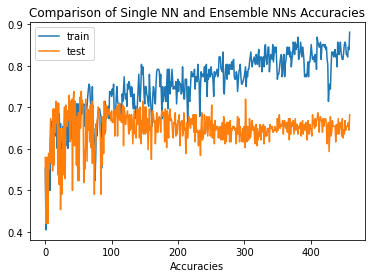

Test Accuracy of Selected NN:  0.6822429895401001


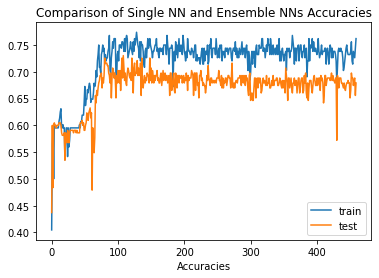

Test Accuracy of Selected NN:  0.6790697574615479


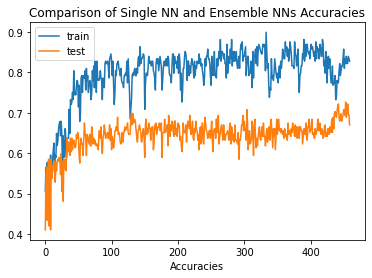

Test Accuracy of Selected NN:  0.6698113083839417


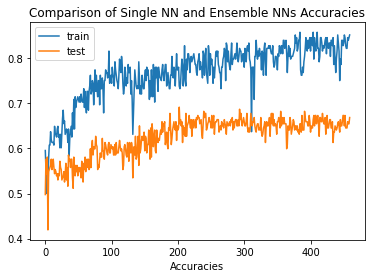

Test Accuracy of Selected NN:  0.6682027578353882


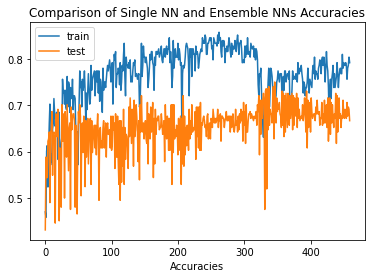

Test Accuracy of Selected NN:  0.6666666865348816


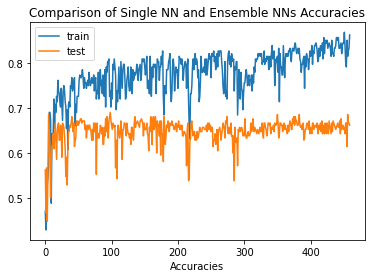

Test Accuracy of Selected NN:  0.6619047522544861


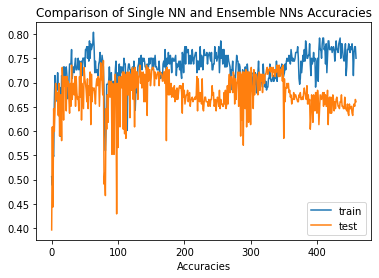

Test Accuracy of Selected NN:  0.6603773832321167


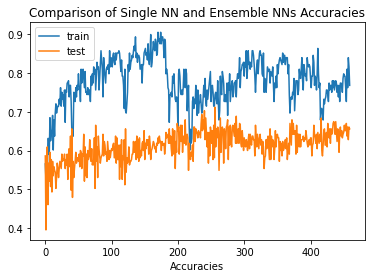

Test Accuracy of Selected NN:  0.6558139324188232


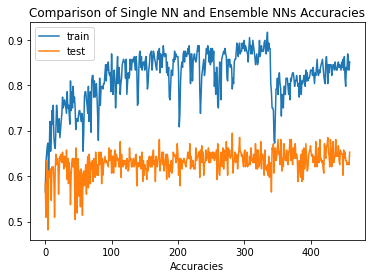

Test Accuracy of Selected NN:  0.6527777910232544


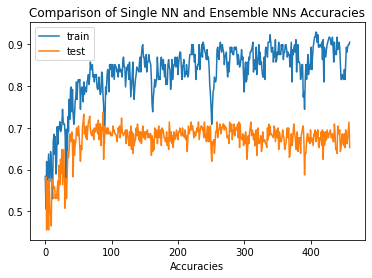

Test Accuracy of Selected NN:  0.6525821685791016


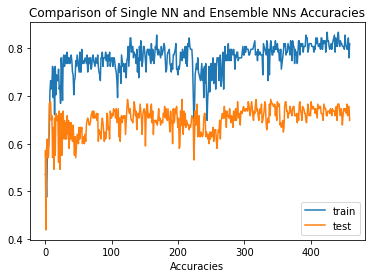

Test Accuracy of Selected NN:  0.6487804651260376


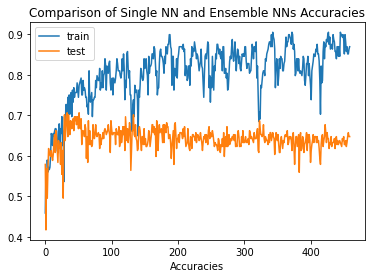

Test Accuracy of Selected NN:  0.6470588445663452


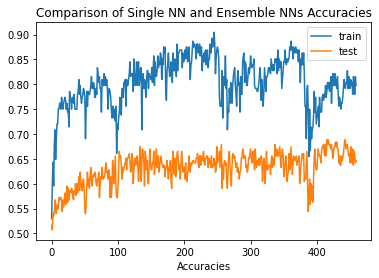

Test Accuracy of Selected NN:  0.6465116143226624


In [55]:
# %tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.utils import resample

class NNModel():
  def __init__(self, inputs, h_nodes, ouputs):
    self.inputs = inputs,
    self.hidden_nodes = h_nodes,
    self.outputs = ouputs,

  def build_model(self, X_train_ds, y_train_ds, X_test_ds, y_test_ds, lrate, epochs):
    model = tf.keras.Sequential([
      tf.keras.layers.Dense(self.inputs[0], activation='relu'),
      tf.keras.layers.Dense(self.hidden_nodes[0], activation='relu'),
      tf.keras.layers.Dense(self.outputs[0], activation='sigmoid'),
    ])

    model.compile(
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      optimizer=keras.optimizers.Adam(learning_rate=lrate),
      metrics=["accuracy"],
    )

    # fit model
    history = model.fit(X_train_ds, y_train_ds, validation_data=(X_test_ds, y_test_ds), epochs=epochs, verbose=0)
   
    # predict the model
    prediction = model.predict(x = X_test_ds, verbose=0)
    np.round(prediction)
    prediction = np.argmax(prediction, axis=1)

    # evaluate the model
    _, train_acc = model.evaluate(X_train_ds, y_train_ds, verbose=0)
    _, test_acc = model.evaluate(X_test_ds, y_test_ds, verbose=0)
    model.save("saved_model/")
    print("Train accuracy: ", train_acc, " ", "Test accuracy: ", test_acc, "\n")
  
    return model, test_acc, prediction, history

# Single Neural Network
def single_nn(X, y, inputs, h_nodes, outputs, lrate, epochs):
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
	nn_model = NNModel(inputs, h_nodes, outputs)
	_, test_acc, y_pred, history = nn_model.build_model(X_train, y_train, X_test, y_test, lrate, epochs)
	return test_acc, y_pred, history

# Ensemble Neural Networks
def ensemble(nns, selected_nns, X, y, inputs, h_nodes, outputs, lrate, epochs):
	scores, members, selected_members, selected_scores, selected_histories = list(), list(), list(), list(), list()
	predictions, histories = list(), list()

	X_train_samples, X_test_samples, y_train_samples, y_test_samples = train_test_split(X, y, test_size=0.30)
	n_samples = round(len(X_train_samples) * 0.7)

	# training NNs by using bootstrap aggregation(bagging) and evaluating the model
	for _ in range(nns):
		# select indexes
		idx_X = [i for i in range(len(X))]
		train_idx_X = resample(idx_X, replace=True, n_samples=n_samples)
		test_idx_X = [x for x in idx_X if x not in train_idx_X]

		# select data
		X_train, y_train = X[train_idx_X], y[train_idx_X]
		X_test, y_test = X[test_idx_X], y[test_idx_X]

		# evaluate the model
		nn_model = NNModel(inputs, h_nodes, outputs)
		model, test_acc, y_pred, history = nn_model.build_model(X_train, y_train, X_test, y_test, lrate, epochs)
		scores.append(test_acc)
		members.append(model)
		predictions.append(y_pred)
		histories.append(history)
	
	# choosing the best NNs
	i = 0
	while i < selected_nns:
		best_index = np.argmax(scores)
		selected_members.append(members[best_index])
		selected_scores.append(scores[best_index])
		selected_histories.append(histories[best_index])
		members.pop(best_index)
		scores.pop(best_index)
		histories.pop(best_index)
		i = i + 1

	# ensemble predictions (majority voting)
	yhats = [model.predict(X_test_samples) for model in selected_members]
	yhats = np.array(yhats)
	sum = np.sum(yhats, axis=0)
	ensemble_pred = np.argmax(sum, axis=1)

	# ensemble accuracies
	count = 0
	j = 0
	for i in ensemble_pred:
		if i == y_test_samples[j]:
			count = count + 1
		j = j + 1
	ensemble_acc = (count / len(ensemble_pred))

	return selected_scores, selected_histories, ensemble_acc, ensemble_pred

# Change ouput label values to '0' and '1' instead of '1' and '2'
def change_label(labels):
    j = 0
    for i in labels:
        if i == 1:
            labels[j] = 0
        elif i == 2:
            labels[j] = 1
        j = j + 1
    return labels

# Loading dataset
liver_ds = pd.read_csv("./dataset/liver.csv")
liver_ds = np.array(liver_ds)
X = liver_ds[:, 0:6]
y = liver_ds[:, 6]
y = change_label(y)

# Model parameters for single 
inputs = 6
h_nodes = 40
outputs = 2
lrate = 0.01
epochs = 300

# Model parameters for ensemble NNs
inputs_en = 6
h_nodes_en = 40
outputs_en = 2
lrate_en = 0.01
epochs_en = 460
nns = 30
selected_nns = 20

print("Train and Test Accuracies of Single Neural Network ")
single_acc, single_label, single_history = single_nn(X, y, inputs, h_nodes, outputs, lrate, epochs)
print("Train and Test Accuracies of Neural Networks for Ensemble ")
accuracies, histories, ensemble_acc, ensemble_pred= ensemble(nns, selected_nns, X, y, inputs_en, h_nodes_en, outputs_en, lrate_en, epochs_en)

# Accuracies for Single NN and Ensemble NNs
print("***Accuracies for Single NN and Ensemble NNs***")
print("Single Neural Network Accuracy: ", single_acc)
print("Ensemble Neural Networks Accuracy: ", ensemble_acc)
print("\n")

# Single NN accuracy plot
print("***Single NN***")
plt.plot(single_history.history['accuracy'], label='train')
plt.plot(single_history.history['val_accuracy'], label='test')
plt.title('Single NN Accuracy')
plt.xlabel('Numbers of Epochs')
plt.xlabel('Accuracies')
plt.legend()
plt.show()
print("Test Accuracy of Single NN: ", single_acc)
print("\n")

# Ensemble NNs accuracy plot
print("***Ensemble NNs***")
for i in range(selected_nns):
    plt.plot(histories[i].history['accuracy'], label='train')
    plt.plot(histories[i].history['val_accuracy'], label='test')
    plt.title('Comparison of Single NN and Ensemble NNs Accuracies')
    plt.xlabel('Numbers of Epochs')
    plt.xlabel('Accuracies')
    plt.legend()
    plt.show()
    print("Test Accuracy of Selected NN: ", accuracies[i])

**Conclusion**

From the result of the experimental trials, it can be shown that combining more than one neural network can improve classification accuracy over that of a single neural network model. Feed Forward Neural Network with backpropagation is used for individual network. Both the voting and bagging ensembles showed siginificant improvement over s single backpropagation network, with the bagging model performing with both high degree of accuracy as well as a low rate of uncladdified cases. All of the neural networks had classification accuracies like a human expert. The accuracy and generalization of the neural network ensemble are compared with a single best neural network on well known machine learning datasets and results will be reported. However, to be a useful system, the total classifcation accuracy would be a more important factor in determining the worth of the neural networks. In this case the ensemble models of Voting and Bagging performed very well and near the quality of a human expert. Therefore, neural network ensemble can provide a greater accuracy and genralization ability than the single best neural network. But the ensemble network is long time than backpropagation network in traning.